### Import dependencies


In [30]:
from stable_baselines3.common.evaluation import evaluate_policy
import os
import gymnasium as gym
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C

### Test environment

In [4]:
!pip install atari-py ale-py

  Using cached atari_py-0.2.9-cp312-cp312-linux_x86_64.whl


In [8]:
# download the rar files for atari before you can proceed
## http:/atarimania.com/roms/Roms.rar

!python -m ale_py.import_roms ./ROMS

/home/einsbert/anaconda3/bin/python: No module named ale_py.import_roms


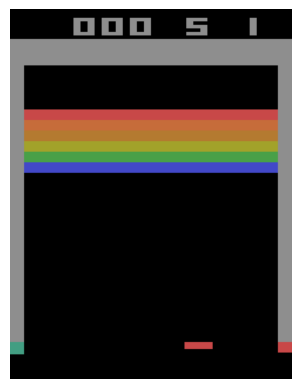

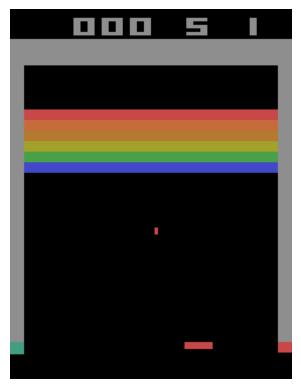

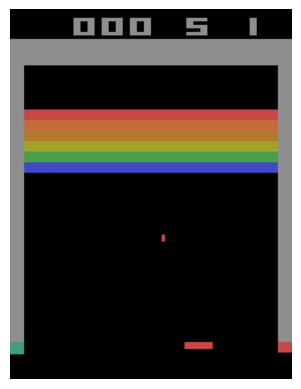

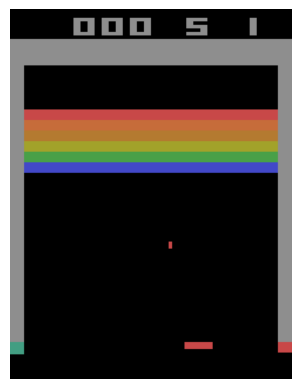

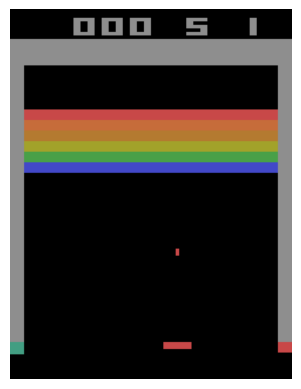

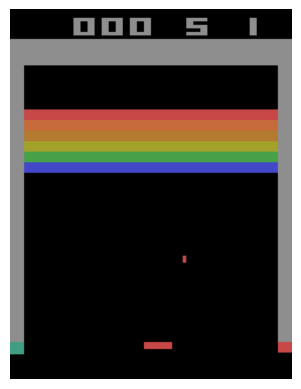

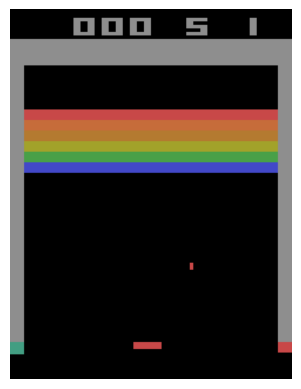

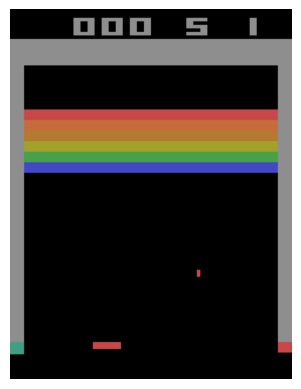

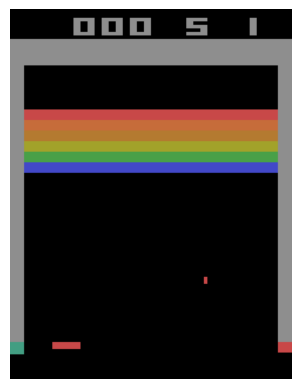

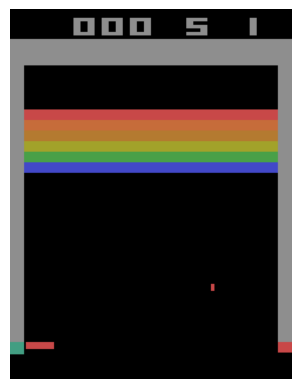

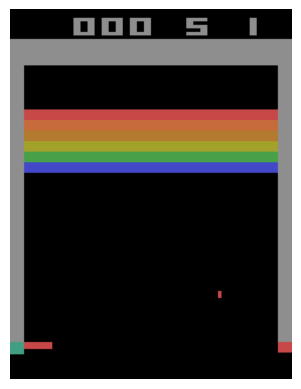

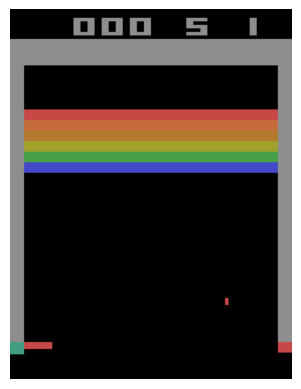

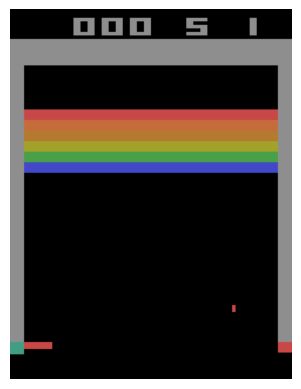

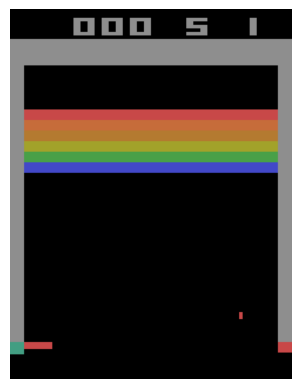

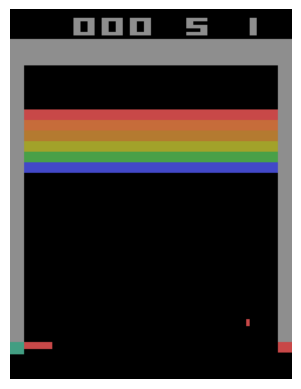

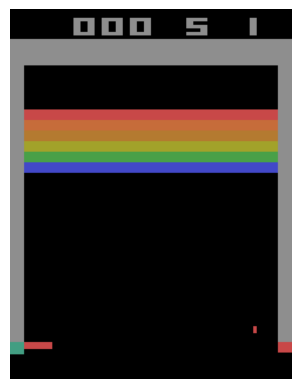

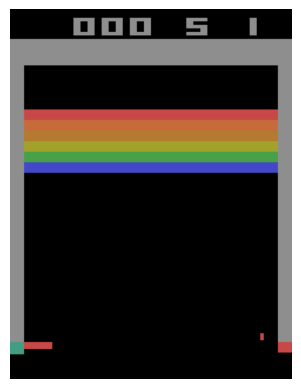

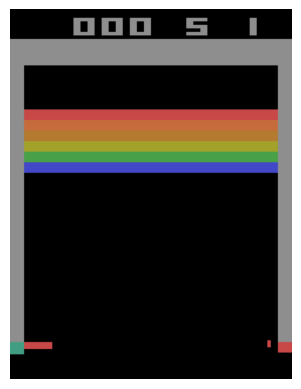

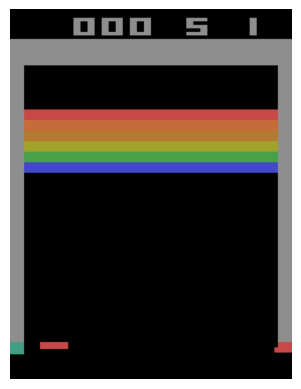

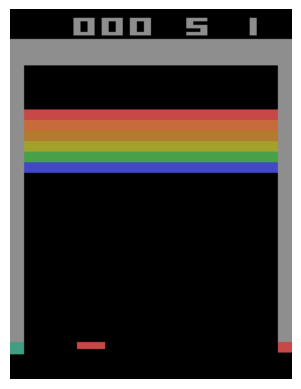

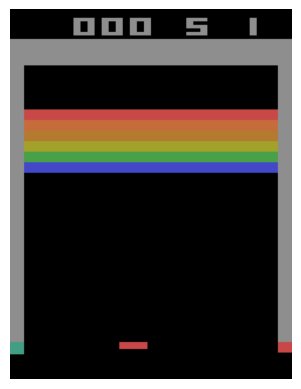

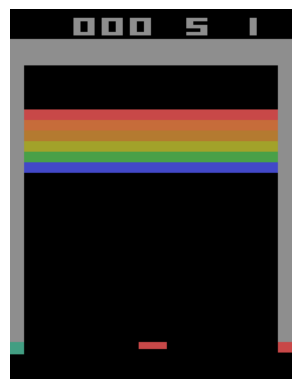

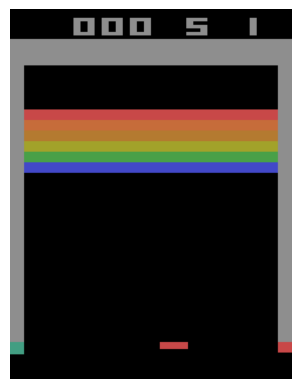

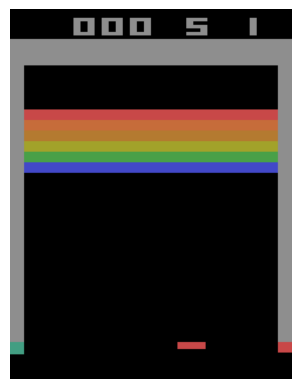

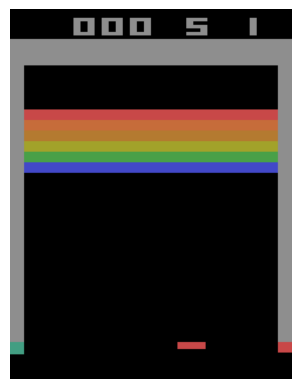

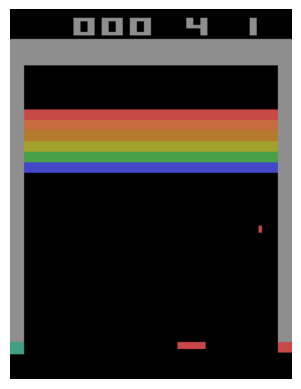

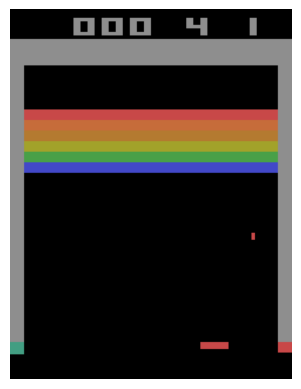

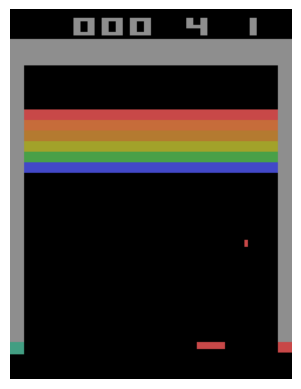

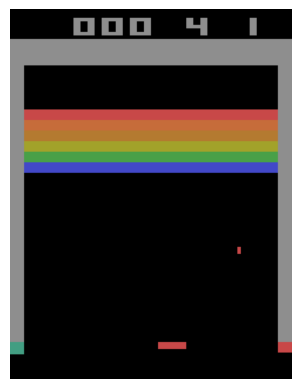

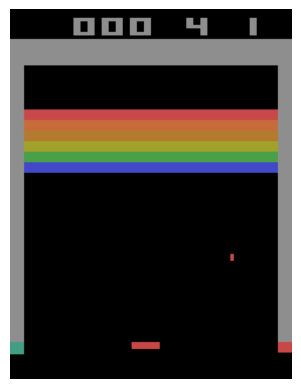

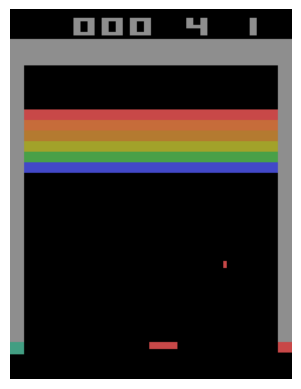

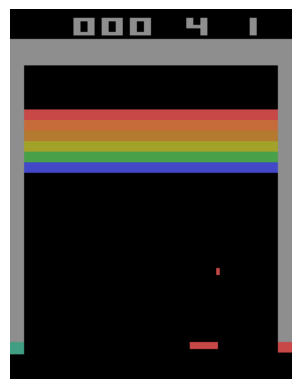

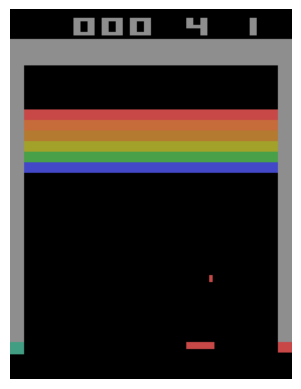

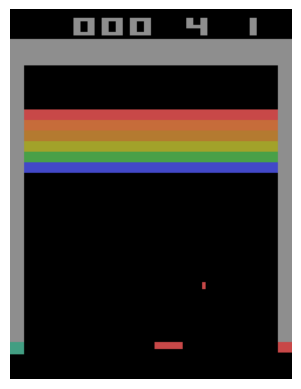

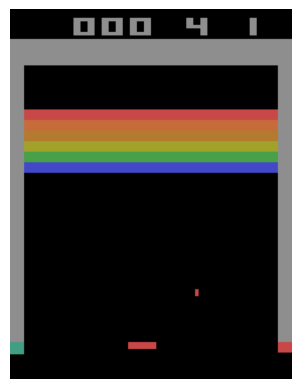

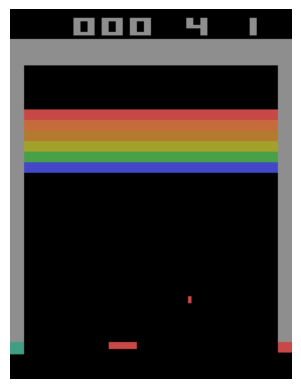

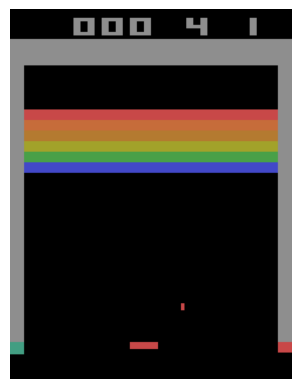

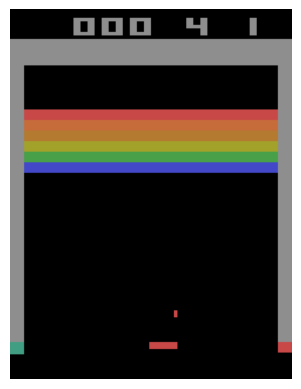

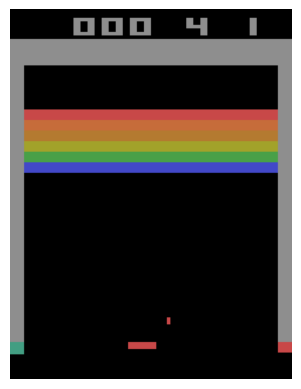

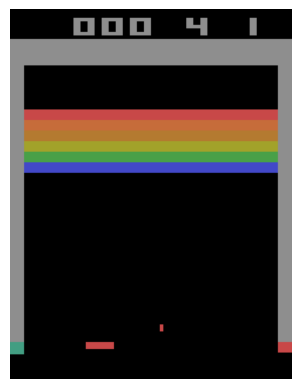

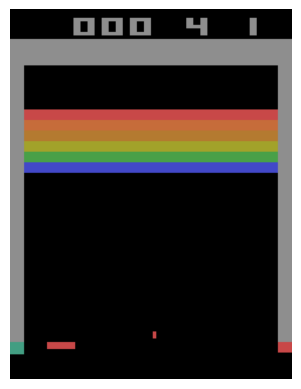

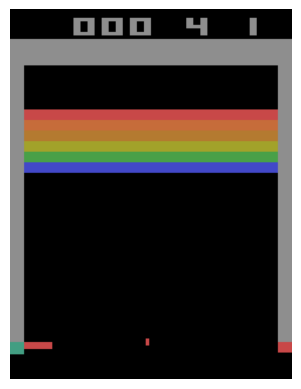

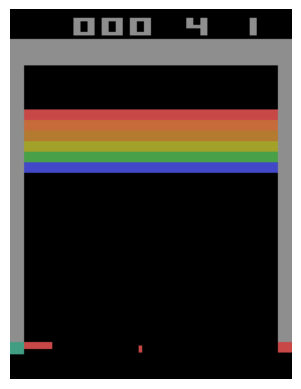

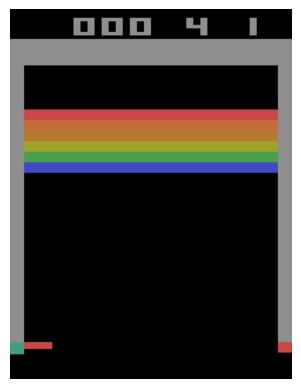

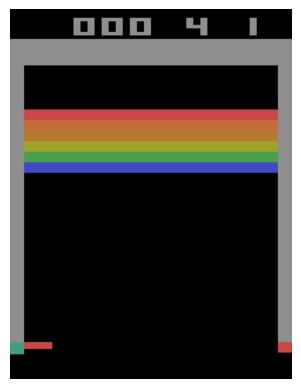

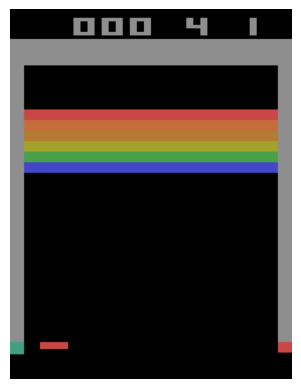

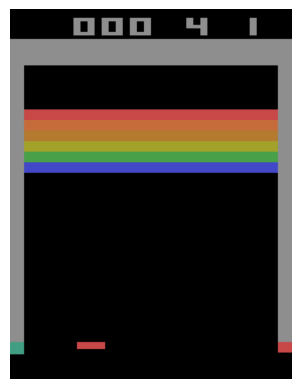

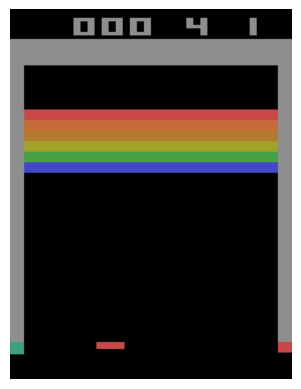

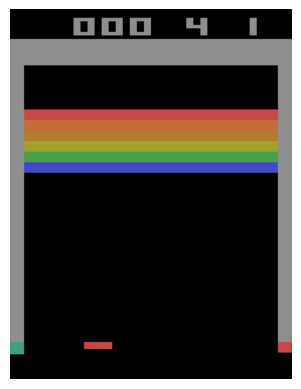

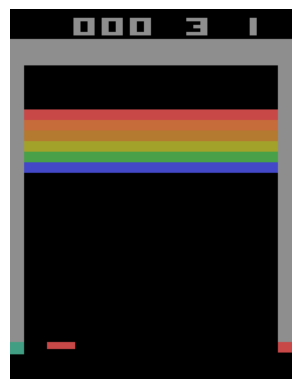

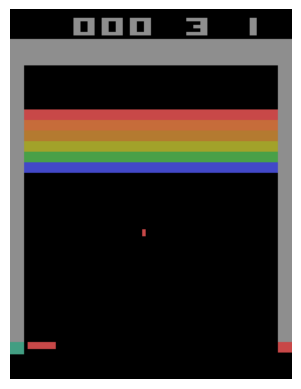

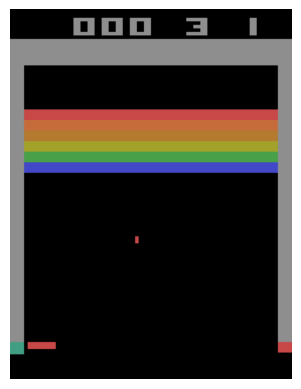

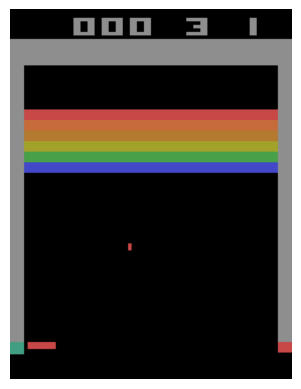

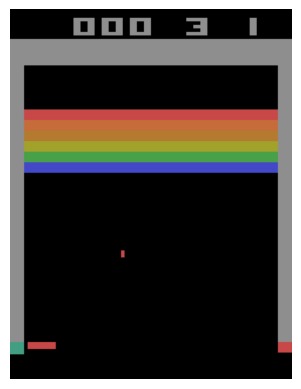

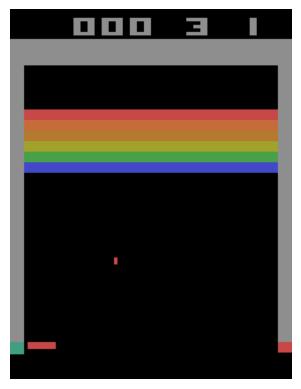

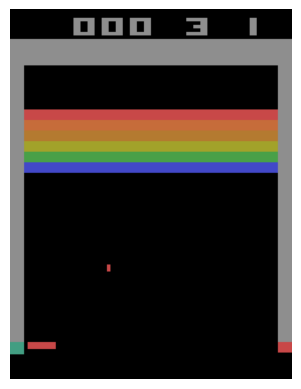

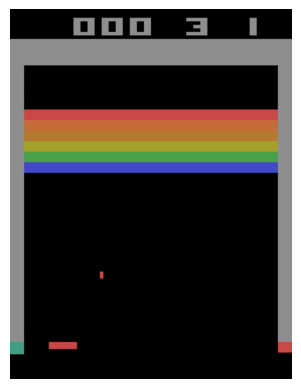

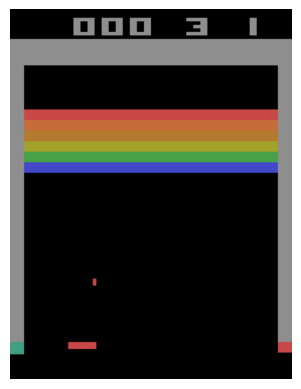

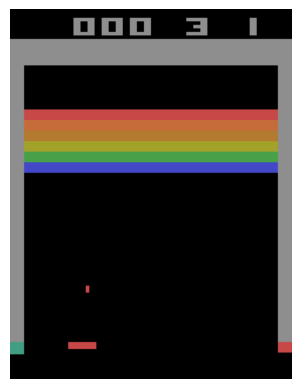

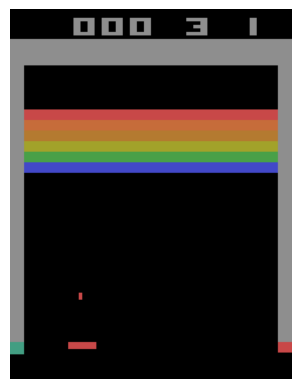

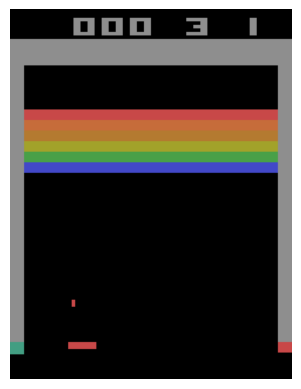

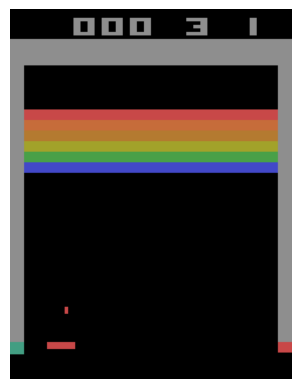

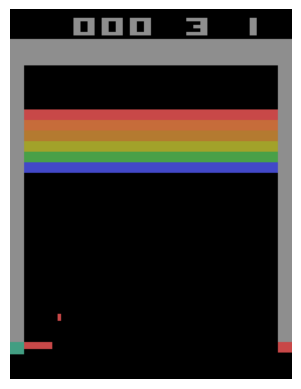

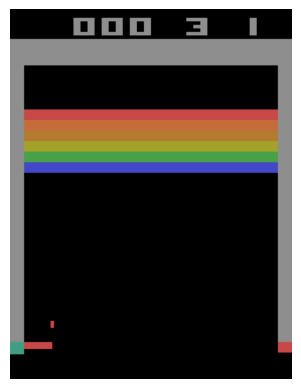

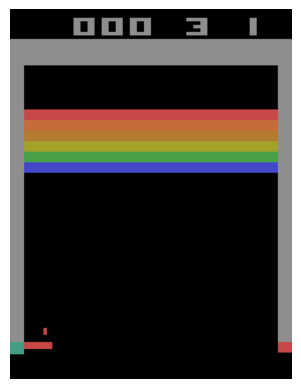

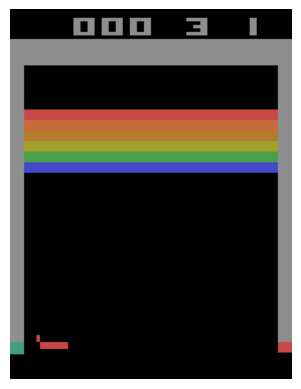

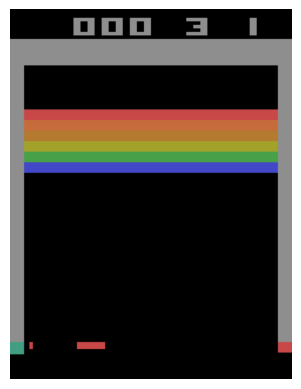

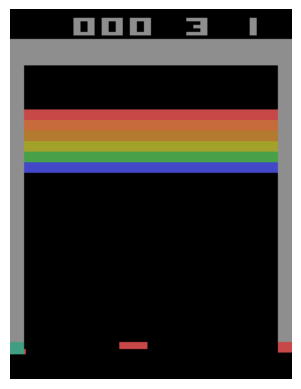

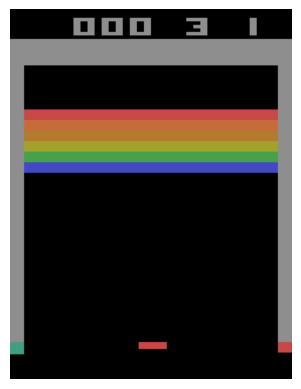

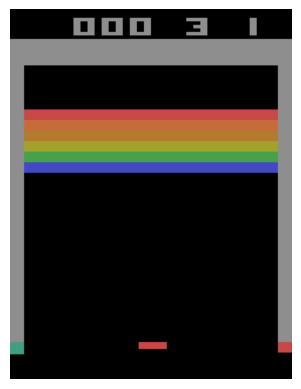

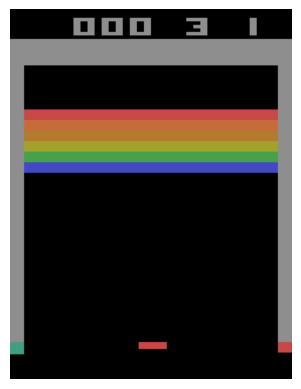

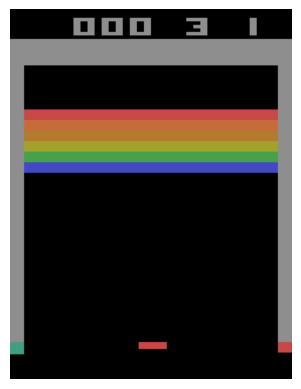

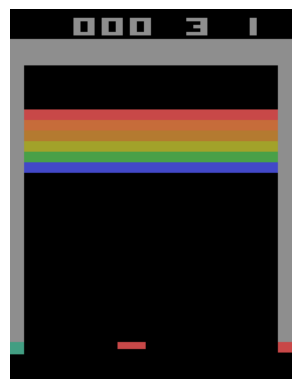

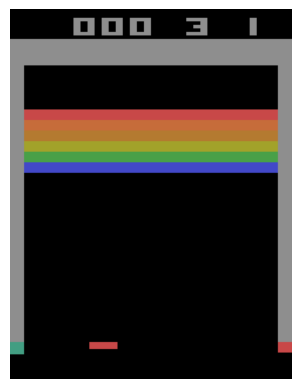

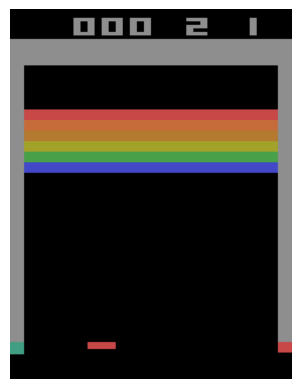

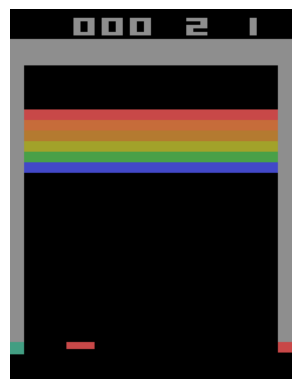

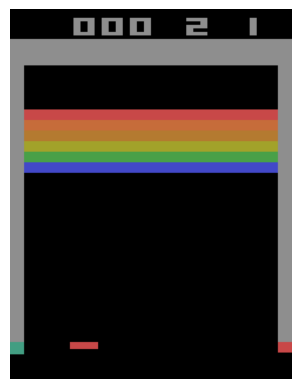

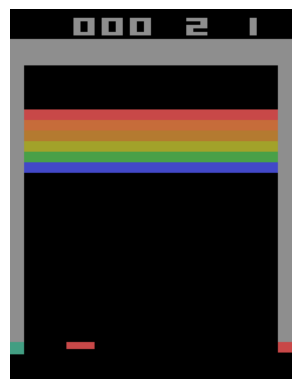

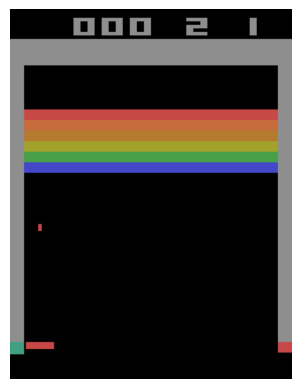

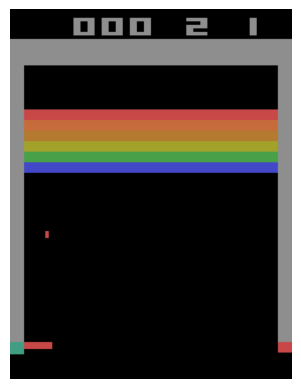

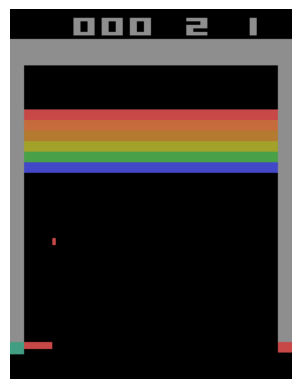

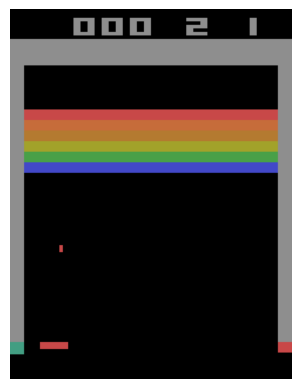

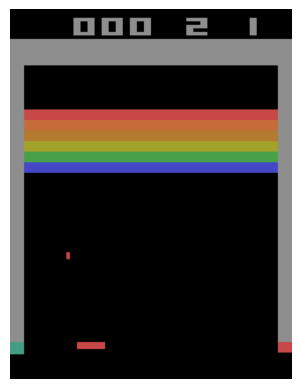

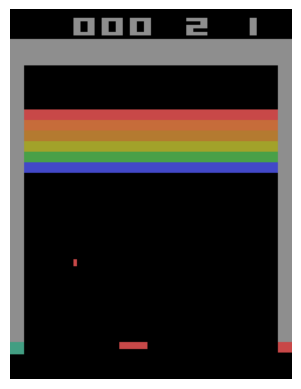

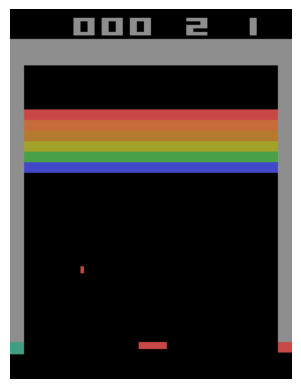

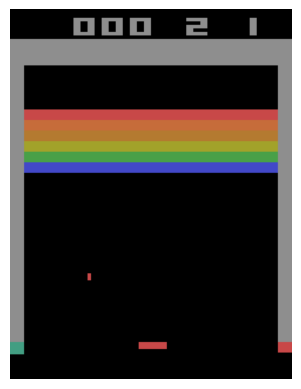

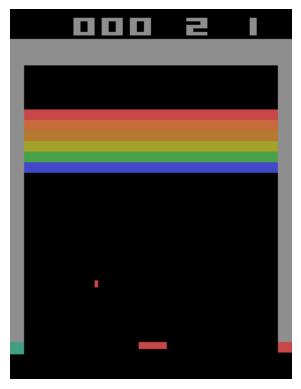

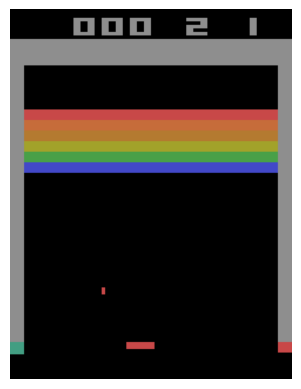

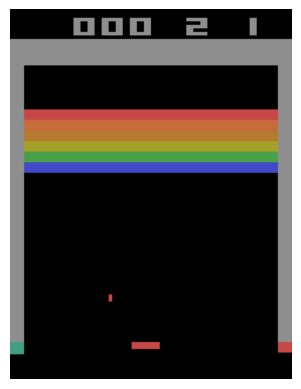

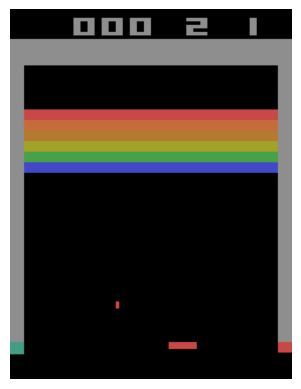

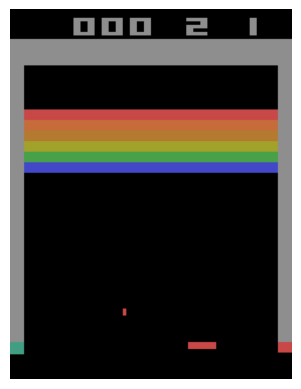

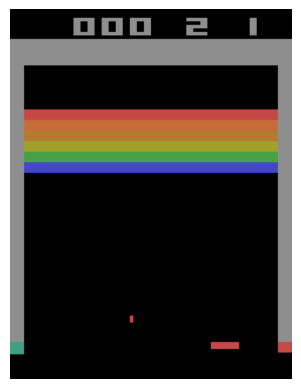

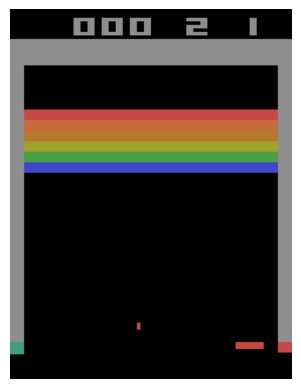

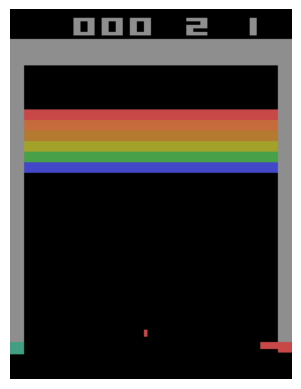

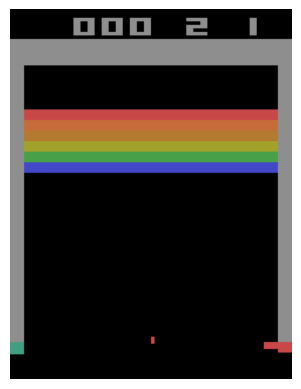

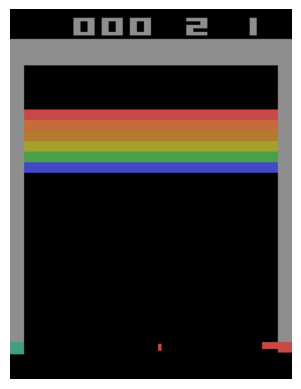

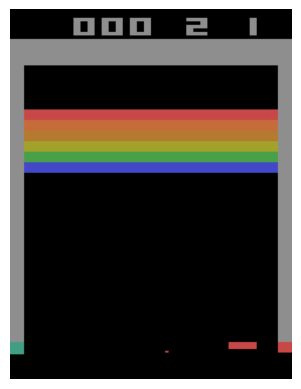

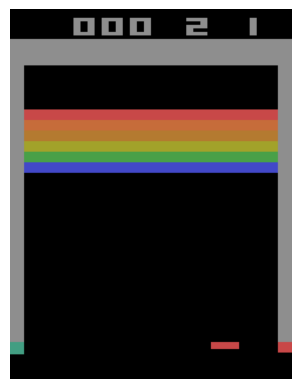

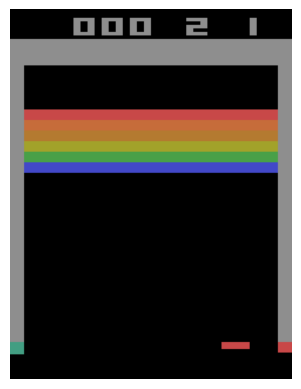

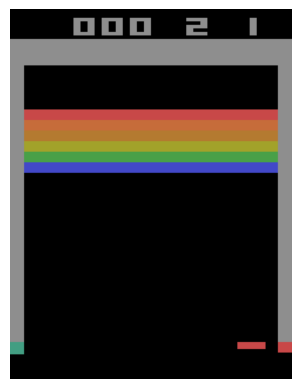

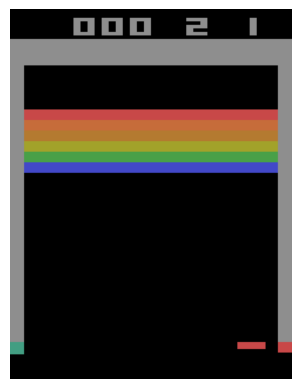

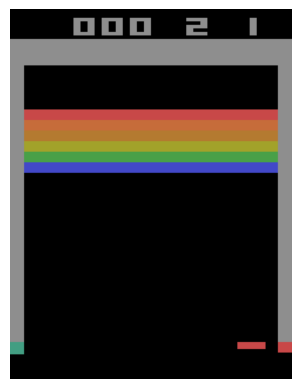

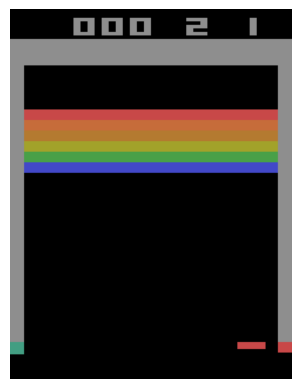

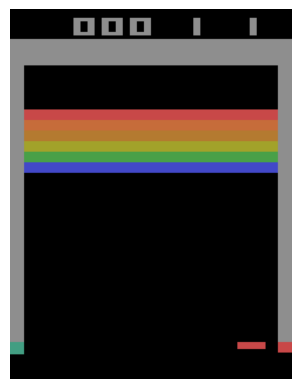

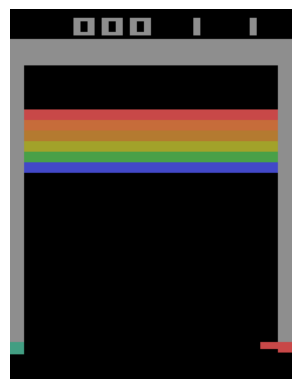

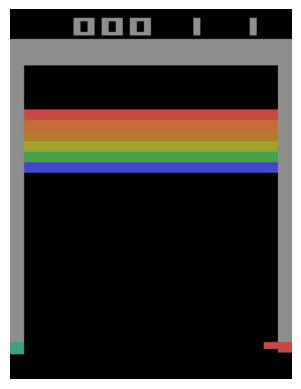

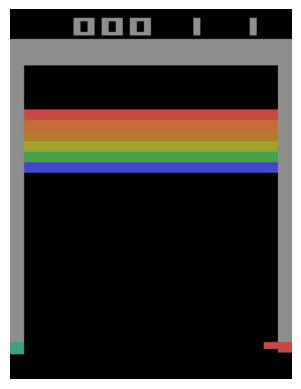

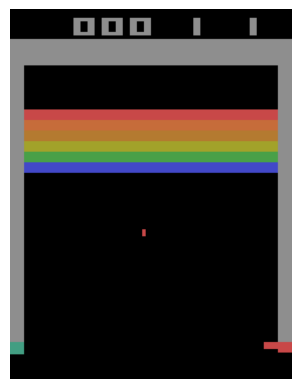

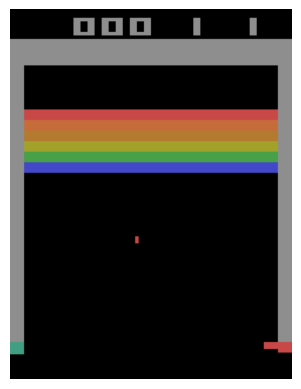

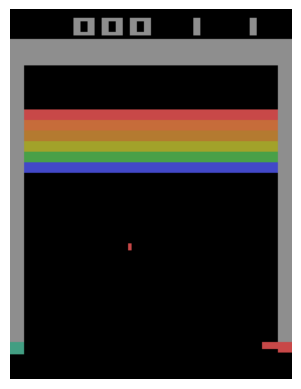

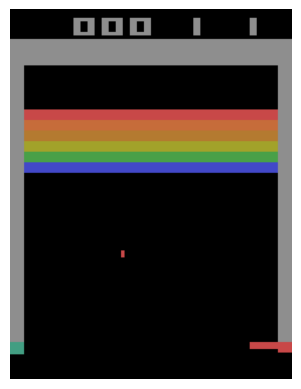

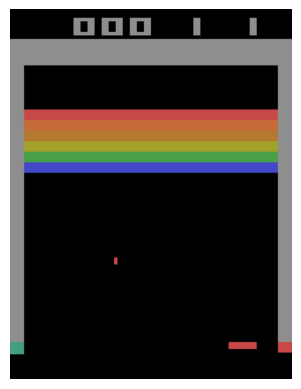

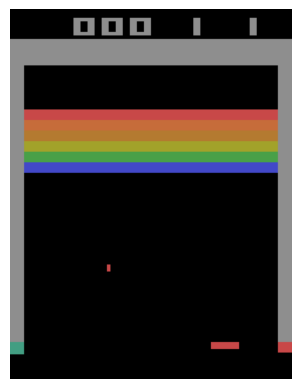

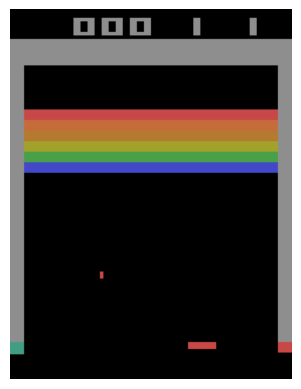

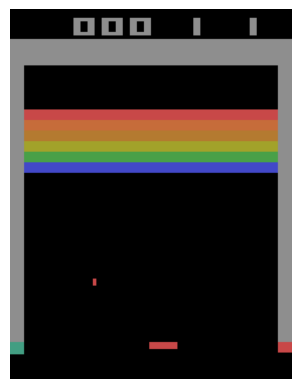

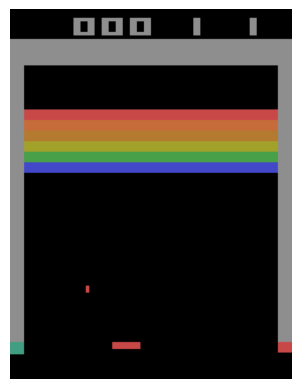

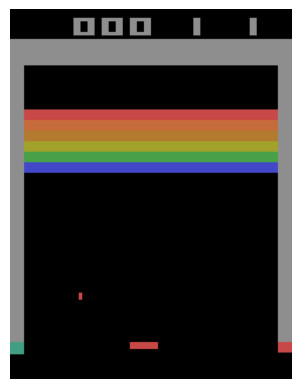

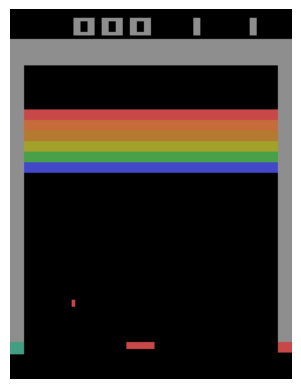

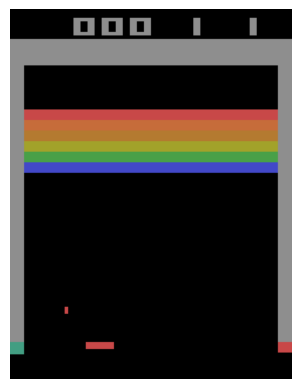

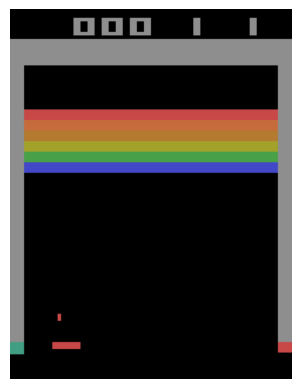

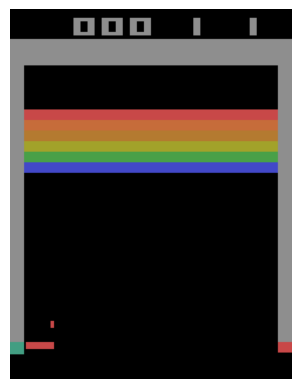

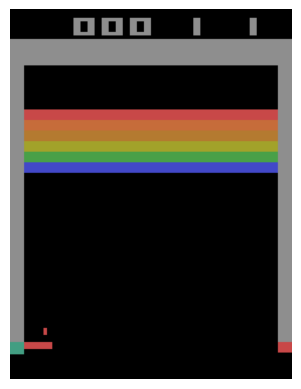

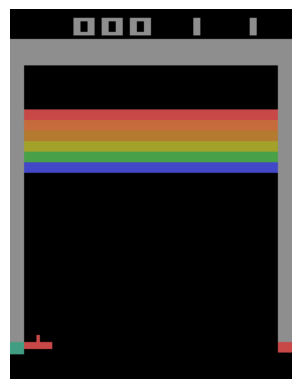

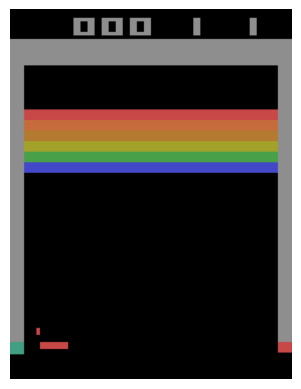

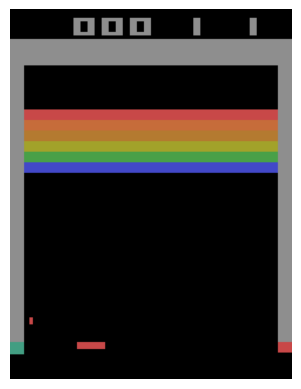

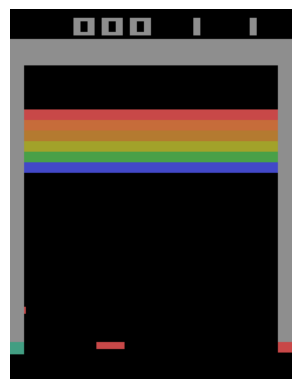

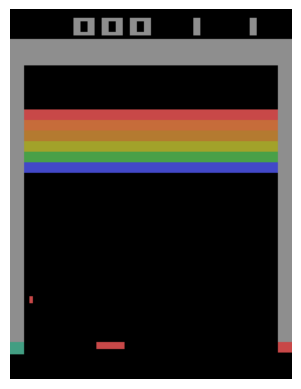

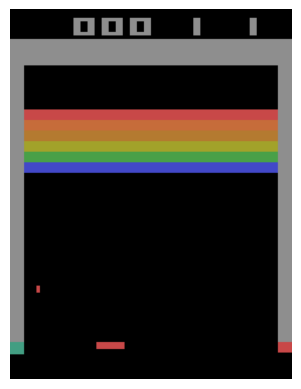

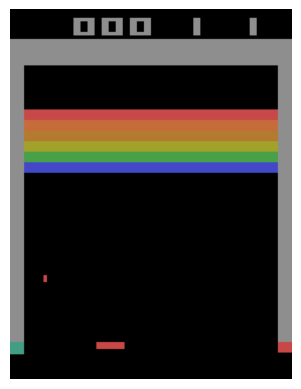

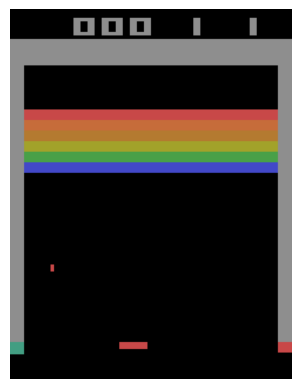

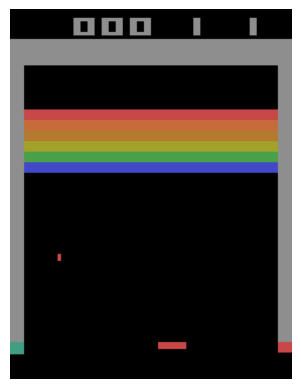

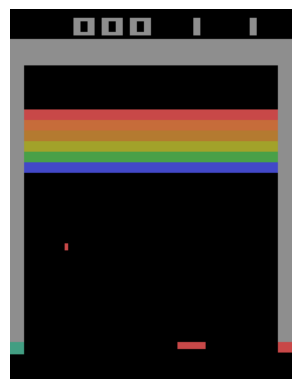

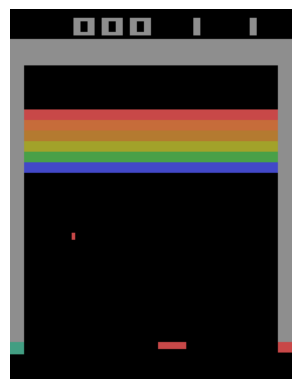

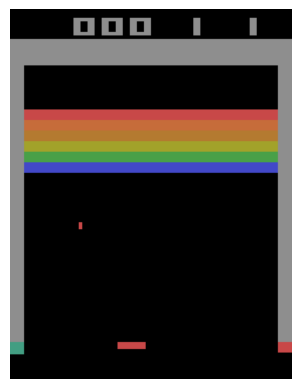

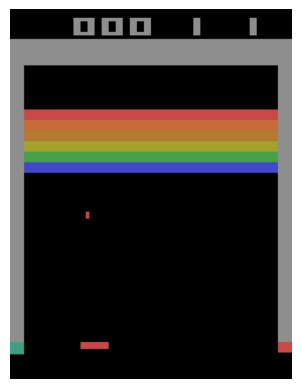

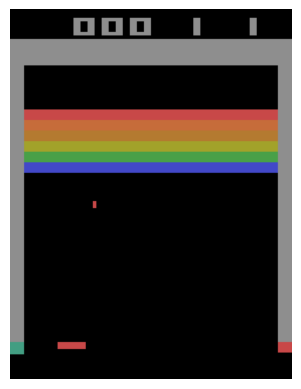

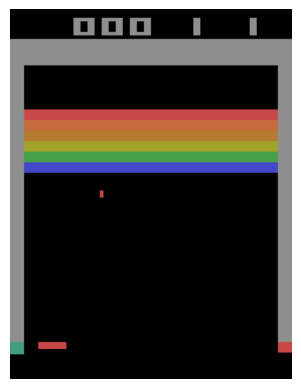

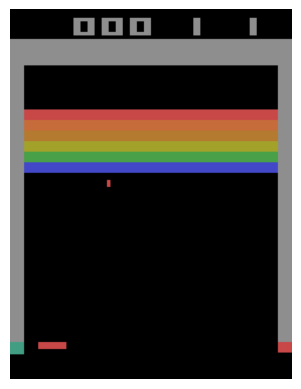

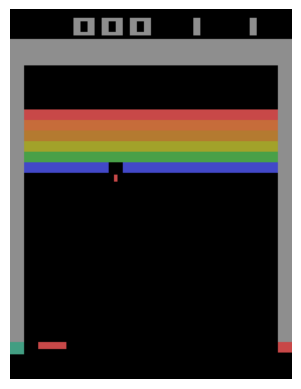

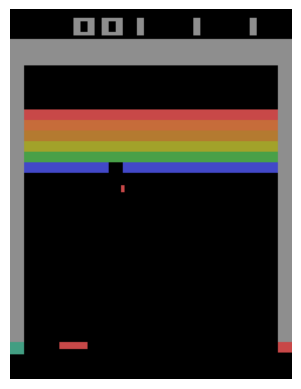

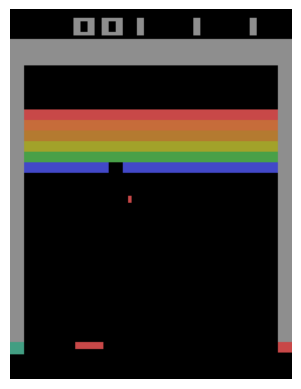

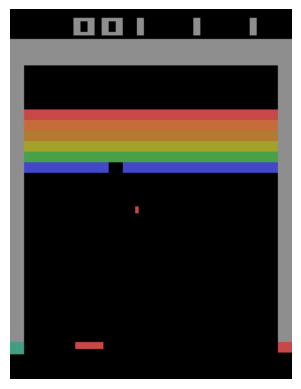

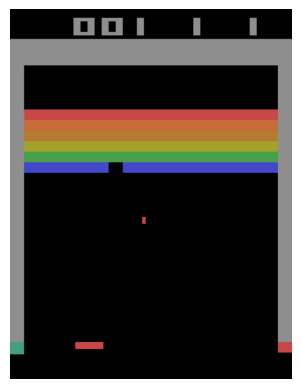

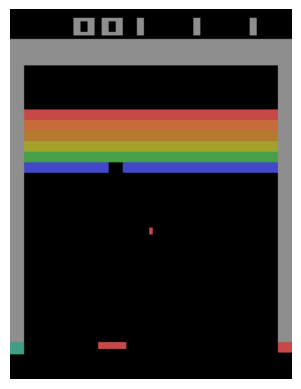

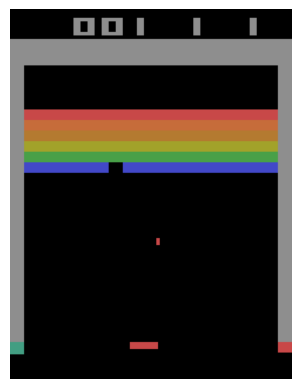

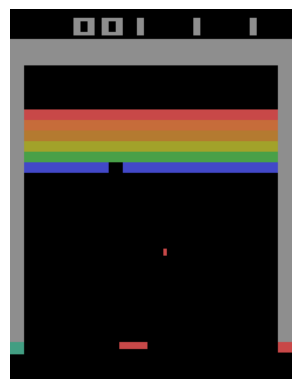

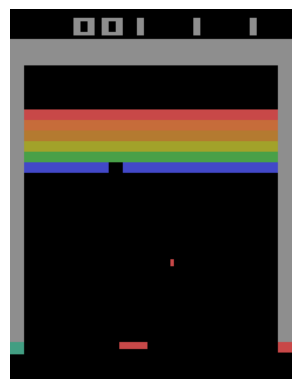

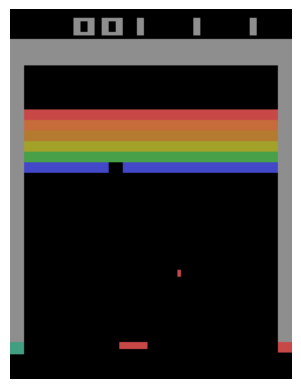

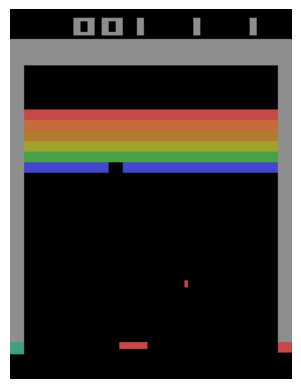

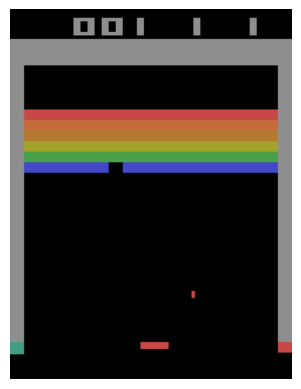

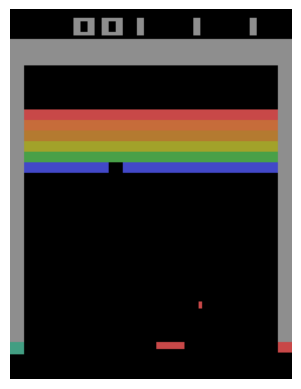

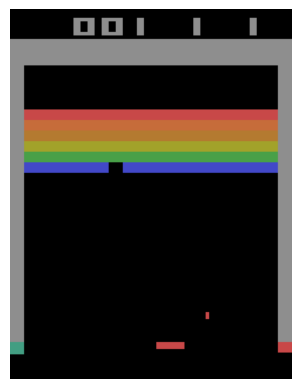

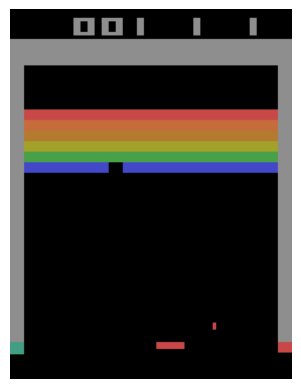

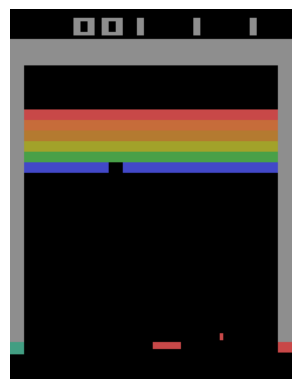

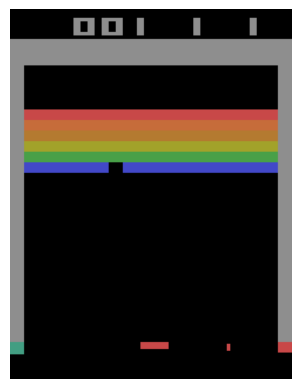

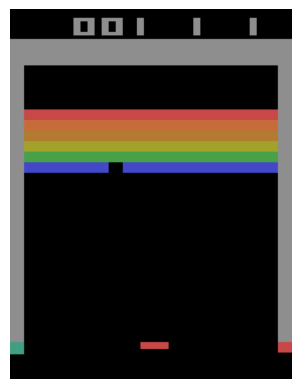

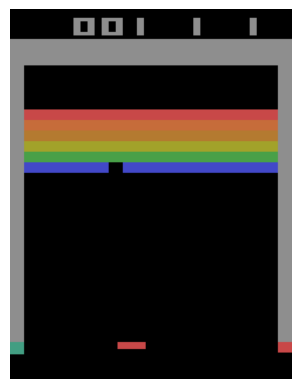

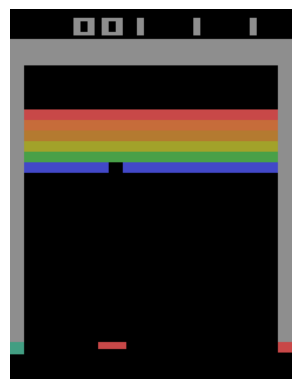

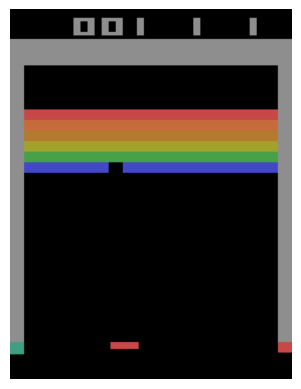

In [31]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("ALE/Breakout-v5", render_mode='rgb_array')
obs, info = env.reset()

done = False
while not done:
    frame = env.render()  # get RGB frame as numpy array
    plt.imshow(frame)
    plt.axis("off")
    plt.show()

    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()


In [37]:
import ale_py
# import gymnasium.envs.atari
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(1400, 900))
# display.start()

# import os
# os.environ["SDL_VIDEODRIVER"] = "dummy"
# print("DISPLAY:", os.environ.get("DISPLAY", "No display variable set"))

env_name = 'ALE/Breakout-v5'
env = gym.make(env_name, render_mode='rgb_array')
env.reset()

num_episodes = 6

for episode in range(1, num_episodes+1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        obs, reward, done,_,_ = env.step(action)
        score += reward
    print(f"Episode: {episode} Score: {score}")

env.close()
        
    

Episode: 1 Score: 2.0
Episode: 2 Score: 1.0
Episode: 3 Score: 0.0
Episode: 4 Score: 2.0
Episode: 5 Score: 4.0
Episode: 6 Score: 1.0


### Vecotrize env and train

In [40]:
env = make_atari_env(env_name, n_envs=4, seed=0)
env = VecFrameStack(env, n_stack=4)

env.reset()
# env.reset().shape

(4, 84, 84, 4)

In [42]:
log_path = os.path.join("Training", "Logs")

model = A2C('CnnPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [43]:
model.learn(total_timesteps=10000)

Logging to Training/Logs/A2C_1
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 238      |
|    ep_rew_mean        | 1.96     |
| time/                 |          |
|    fps                | 135      |
|    iterations         | 100      |
|    time_elapsed       | 14       |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.37    |
|    explained_variance | -0.177   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.271   |
|    value_loss         | 0.113    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 238      |
|    ep_rew_mean        | 1.92     |
| time/                 |          |
|    fps                | 136      |
|    iterations         | 200      |
|    time_elapsed       | 29       |
|    total_timesteps    | 4000     |
| train

### save and reload model

In [ ]:
### You can save and reload


### evaluate and test

In [44]:
evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

(8.2, 2.993325909419153)